# Ejercicios procesos estocásticos discretos

### Clima como cadena de Markov:
Siendo el estado 1 que llueve y 2 No llueve, la matriz de transición es
$\begin{bmatrix}
0.6 & 0.4\\
0.2 & 0.8 
\end{bmatrix}$
Simular la evolución del sistema durante 100 días partiendo de que ayer fue un día despejado. 

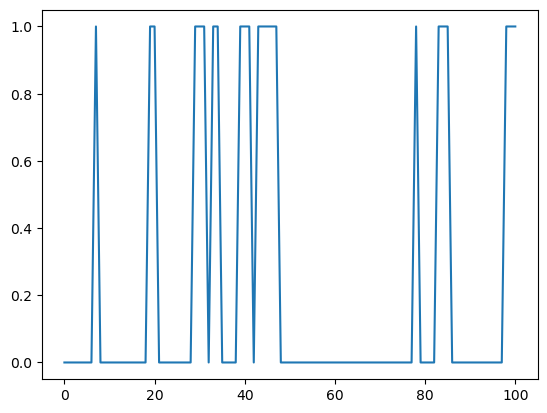

In [19]:
import numpy as np
import matplotlib.pyplot as plt

transit_matrix=np.array([[0.6,0.4],[0.2,0.8]])
probabs=transit_matrix[1,:] #Inicio en estado 2
lista_estados=[0] #0 para no lluvia, 1 para lluvia
for i in range(100):
    u=np.random.uniform()
    if u<=probabs[0]:
        
        lista_estados.append(1)
        probabs=transit_matrix[0,:]
    else: 
        lista_estados.append(0)
        probabs=transit_matrix[1,:]
plt.plot(lista_estados)

    